In [1]:
%matplotlib inline
import networkx as nx

## 代表的なグラフ

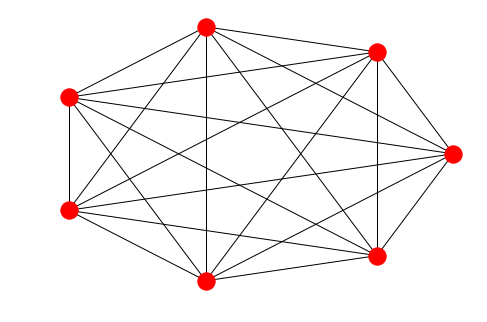

In [2]:
# 完全グラフ
nx.draw_circular(nx.complete_graph(7))

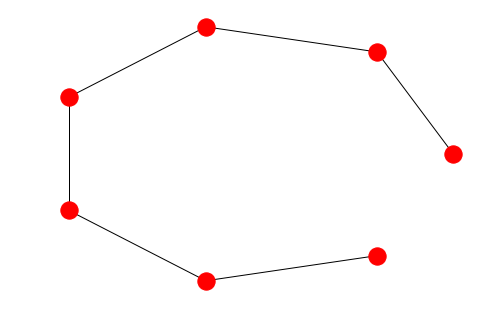

In [3]:
# 道
nx.draw_circular(nx.path_graph(7))

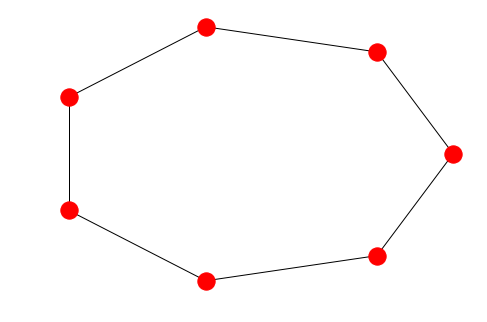

In [4]:
# 閉路
nx.draw_circular(nx.cycle_graph(7))

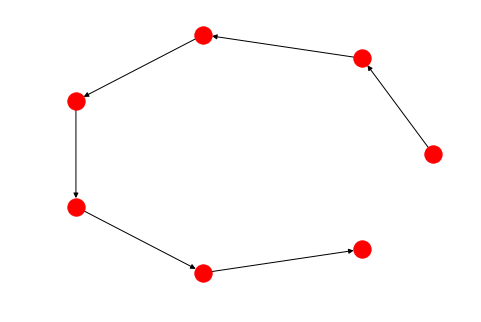

In [5]:
# 有向道
def dpath(n):
    g = nx.DiGraph()
    for i in range(n-1): 
        g.add_edge(i, i+1)
    return g

nx.draw_circular(dpath(7), arrow=True)

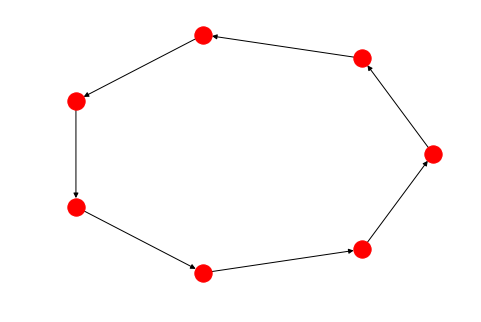

In [6]:
# 有向閉路
def dcycle(n):
    g = nx.DiGraph()
    for i in range(n-1): 
        g.add_edge(i, i+1)
    g.add_edge(n-1, 0)
    return g

nx.draw_circular(dcycle(7), arrow=True)

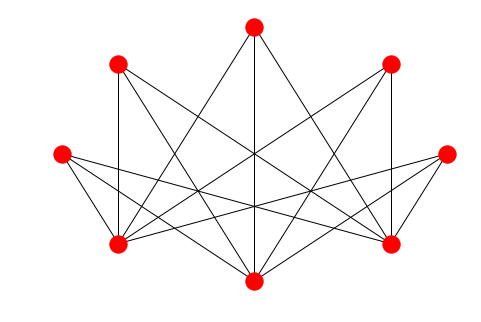

In [7]:
# 完全二部グラフ
nx.draw_shell(nx.complete_multipartite_graph(5, 3))

## 部分グラフとしての道と閉路

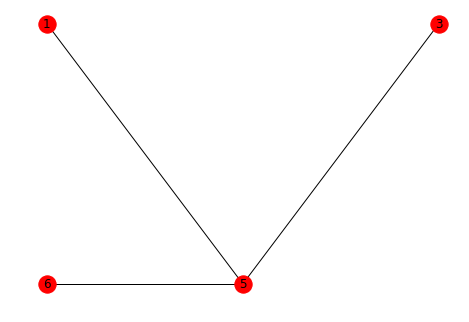

In [8]:
G1 = nx.Graph()
G1.add_nodes_from([1, 3, 5, 6])
G1.add_edges_from([(1, 5), (3, 5), (5, 6)])
mypos = {1: (0, 10), 2: (10, 10), 3: (20, 10), 4: (20, 0), 5: (10, 0), 6: (0, 0)}
nx.draw(G1, pos=mypos, with_labels=True)

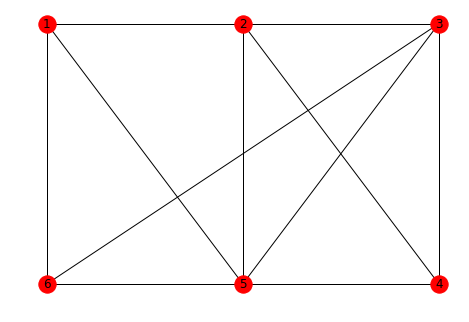

In [9]:
G2 = nx.Graph()
G2.add_nodes_from([1, 2, 3, 4, 5, 6])
G2.add_edges_from([(1, 2), (1, 5), (1, 6), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (3, 6), (4, 5), (5, 6)])
nx.draw(G2, pos=mypos, with_labels=True)

In [10]:
def is_subgraph(g, h): # True iff g が h の部分グラフ
    for v in g.nodes():
        if v not in h.nodes():
            return False
    for e in g.edges():
        if e not in h.edges():
            return False
    return True

In [11]:
is_subgraph(G1, G2)

True

## グラフの連結性と連結成分

In [12]:
V = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']

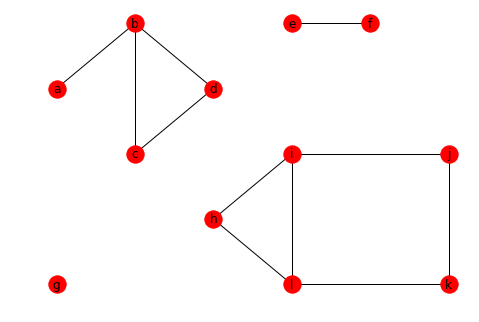

In [13]:
# 非連結なグラフの例
G1 = nx.Graph()
G1.add_nodes_from(V)
G1.add_edges_from([('a', 'b'), ('b', 'c'), ('b', 'd'), ('c', 'd'), ('e', 'f'), ('h', 'i'), \
                   ('h', 'l'), ('i', 'j'), ('i', 'l'), ('j', 'k'), ('k', 'l')])
mypos1 = {'a': (0, 15), \
          'b': (5, 20), \
          'c': (5, 10), \
          'd': (10, 15), \
          'e': (15, 20), \
          'f': (20, 20), \
          'g': (0, 0), \
          'h': (10, 5), \
          'i': (15, 10), \
          'j': (25, 10), \
          'k': (25, 0), \
          'l': (15, 0)
        }
nx.draw(G1, pos=mypos1, with_labels=True)

In [14]:
# 連結性の判定
nx.is_connected(G1)

False

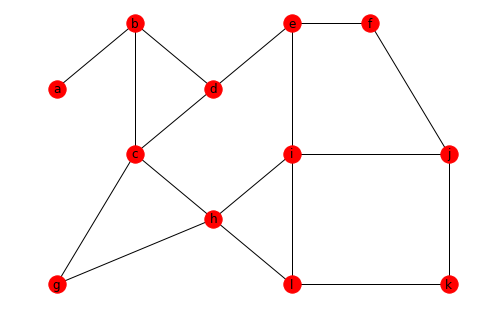

In [15]:
# 連結なグラフの例
G2 = nx.Graph()
G2.add_nodes_from(V)
G2.add_edges_from([('a', 'b'), ('b', 'c'), ('b', 'd'), ('c', 'd'), ('c', 'g'), ('c', 'h'), \
                   ('d', 'e'), ('e', 'f'), ('e', 'i'), ('f', 'j'), ('g', 'h'), ('h', 'i'), \
                   ('h', 'l'), ('i', 'j'), ('i', 'l'), ('j', 'k'), ('k', 'l')])
nx.draw(G2, pos=mypos1, with_labels=True)

In [16]:
# 連結性の判定
nx.is_connected(G2)

True

In [17]:
# 連結成分の数
nx.number_connected_components(G1)

4

In [18]:
# 各連結成分の頂点集合を印字
for c in nx.connected_components(G1):
    print(c)

set(['a', 'c', 'b', 'd'])
set(['e', 'f'])
set(['g'])
set(['i', 'h', 'k', 'j', 'l'])


In [19]:
# 各連結成分の辺集合を印字
for g in nx.connected_component_subgraphs(G1):
    print(g.edges())

[('a', 'b'), ('c', 'b'), ('c', 'd'), ('b', 'd')]
[('e', 'f')]
[]
[('i', 'h'), ('i', 'j'), ('i', 'l'), ('h', 'l'), ('k', 'j'), ('k', 'l')]


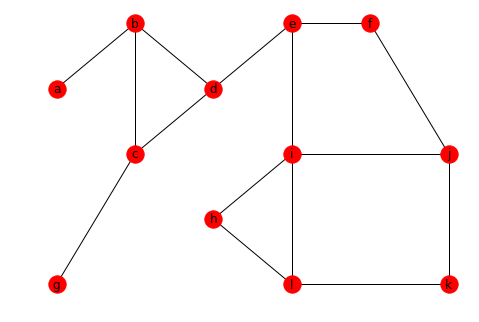

In [20]:
G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from([('a', 'b'), ('b', 'c'), ('b', 'd'), ('c', 'd'), ('c', 'g'), \
                  ('d', 'e'), ('e', 'f'), ('e', 'i'), ('f', 'j'), ('h', 'i'), \
                  ('h', 'l'), ('i', 'j'), ('i', 'l'), ('j', 'k'), ('k', 'l')])
nx.draw(G, pos=mypos1, with_labels=True)

In [21]:
# 辺 ('d', 'e') が切断辺であるか，確認
print(nx.number_connected_components(G))
G.remove_edge('d', 'e')
print(nx.number_connected_components(G))

1
2


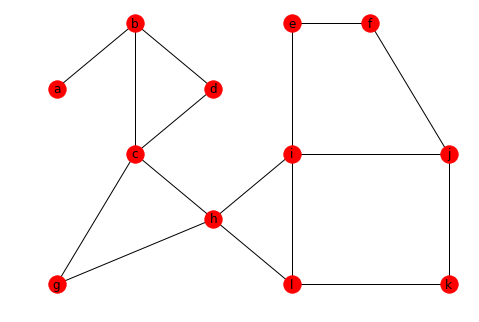

In [22]:
G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from([('a', 'b'), ('b', 'c'), ('b', 'd'), ('c', 'd'), ('c', 'g'), \
                  ('c', 'h'), ('e', 'f'), ('e', 'i'), ('f', 'j'), ('g', 'h'), \
                  ('h', 'i'), ('h', 'l'), ('i', 'j'), ('i', 'l'), ('j', 'k'), \
                  ('k', 'l')])
nx.draw(G, pos=mypos1, with_labels=True)

In [23]:
# 頂点 'h' が切断点であるか，確認
print(nx.number_connected_components(G))
G.remove_node('h')
print(nx.number_connected_components(G))

1
2


## 最大性論法による証明

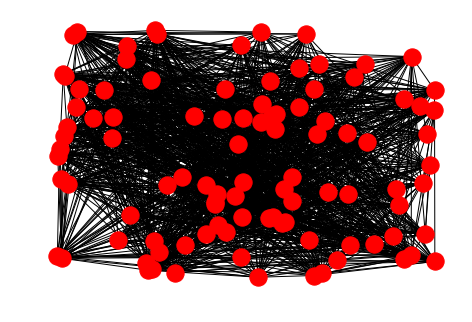

In [24]:
# ランダムグラフの生成
G=nx.fast_gnp_random_graph(100,0.3)
nx.draw_random(G)

In [25]:
# 最小次数
def min_degree(G):
    return min(dict(G.degree()).values())

min_degree(G)

19

In [26]:
# 頂点 0 を始点とする極大道を1つ見つける
# (最大道とは限らない)
t = nx.dfs_successors(G, 0)
v = 0
path = [v]
while v in t:
    v = t[v][0]
    path.append(v)
print(path)

[0, 1, 4, 2, 3, 7, 13, 8, 14, 9, 5, 10, 19, 11, 6, 12, 18, 17, 20, 25, 30, 16, 31, 38, 21, 15, 24, 70, 96, 40, 26, 23, 27, 28, 22, 39, 43, 32, 33, 34, 36, 41, 37, 35, 47, 55, 44, 29, 45, 46, 51, 49, 57, 53, 48, 42, 50, 59, 99, 54, 52, 62, 65, 67, 56, 66, 58, 61, 64, 74, 76, 60, 68, 69, 71, 72, 63, 77, 79, 73, 86, 75, 82, 83, 78, 81, 80, 92, 87, 84, 89, 90, 85, 94, 95, 88, 93, 98, 91]


In [27]:
# 見つけた道の頂点数
len(path)

99

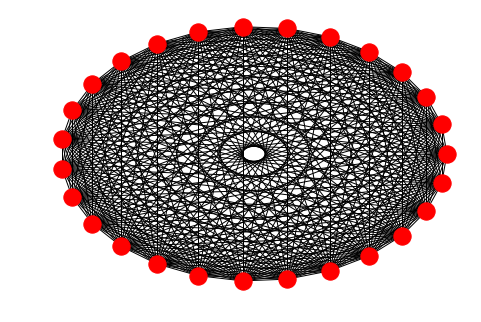

In [28]:
# 完全グラフでも同じことをやってみる
G = nx.complete_graph(27)
nx.draw_circular(G)

In [29]:
min_degree(G)

26

In [30]:
t = nx.dfs_successors(G, 0)
v = 0
path = [v]
while v in t:
    v = t[v][0]
    path.append(v)
print(path)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [31]:
len(path)

27